### Blog-Generation-using-Lamggraph-opensource-LLMs

In [ ]:
import os
from typing import TypedDict
from typing import Dict, List, Tuple, Annotated
from langgraph.graph import StateGraph
from langsmith import traceable
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langgraph.constants import START, END
from langchain_groq import ChatGroq
from pydantic import BaseModel
from typing import Optional, Any
from dataclasses import dataclass
from dotenv import load_dotenv
load_dotenv()

# Initialize LLM
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
llm=ChatGroq(model="qwen-2.5-32b")

In [2]:
# Define the states
@dataclass
class BlogState:
    topic: Optional[str] = None
    outline: Optional[str] = None
    draft: Optional[str] = None
    edited_draft: Optional[str] = None

In [3]:
# Define the nodes (functions)
def select_topic(state: BlogState):
    prompt = ChatPromptTemplate.from_template("Suggest a blog topic: {user_request}")
    chain = prompt | llm | StrOutputParser()
    topic = chain.invoke({"user_request": "Suggest a popular and interesting blog topic."})
    return {"topic": topic}

def generate_outline(state: BlogState):
    prompt = ChatPromptTemplate.from_template("Generate an outline for a blog about: {topic}")
    chain = prompt | llm | StrOutputParser()
    outline = chain.invoke({"topic": state.topic})
    return {"outline": outline}

def draft_content(state: BlogState):
    prompt = ChatPromptTemplate.from_template("Write a blog draft based on the following outline: {outline}")
    chain = prompt | llm | StrOutputParser()
    draft = chain.invoke({"outline": state.outline})
    return {"draft": draft}

def review_and_edit(state: BlogState):
    prompt = ChatPromptTemplate.from_template("Review and edit the following blog draft: {draft}")
    chain = prompt | llm | StrOutputParser()
    edited_draft = chain.invoke({"draft": state.draft})
    return {"edited_draft": edited_draft}

In [4]:
def publishing(state: BlogState):
    print(f"Final Blog Draft: \n{state.edited_draft}")
    return {}

In [5]:
# Define the graph
workflow = StateGraph(BlogState)
workflow.add_node("topic_selection", select_topic)
workflow.add_node("outline_generation", generate_outline)
workflow.add_node("draft_content", draft_content)
workflow.add_node("review_and_edit", review_and_edit)
workflow.add_node("publishing", publishing)

In [6]:
# Define the edges
workflow.add_edge("topic_selection", "outline_generation")
workflow.add_edge("outline_generation", "draft_content")
workflow.add_edge("draft_content", "review_and_edit")
workflow.add_edge("review_and_edit", "publishing")
workflow.set_entry_point("topic_selection")

In [7]:
chain = workflow.compile()

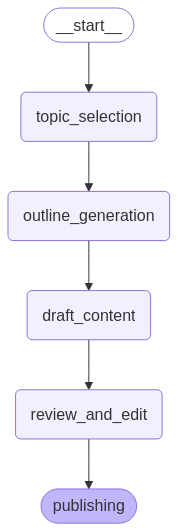

In [8]:
from IPython.display import Image, display
display(Image(chain.get_graph().draw_mermaid_png()))

In [9]:
BlogState=chain.invoke({"topic":"pydantic"})

Final Blog Draft: 
Your draft is well-structured and informative. Here are some edits to enhance clarity, flow, and engagement:

### The Impact of Artificial Intelligence on Daily Life

#### Introduction
Artificial Intelligence (AI) is no longer a mere concept confined to futuristic novels and sci-fi movies. Today, it has seamlessly integrated into the fabric of our daily lives, revolutionizing industries, personal interactions, and even the way we enjoy entertainment. As we embrace this technological revolution, it's crucial to understand the profound influence AI has on shaping our world. This blog will explore how AI is reshaping healthcare, transportation, and entertainment, while also delving into the ethical considerations and everyday applications of AI that might surprise you.

#### 1. AI in Healthcare
AI's impact in healthcare is transforming the way diseases are diagnosed and treated. From AI-driven diagnostic tools that can analyze medical images with higher accuracy than hu

In [10]:
BlogState

{'topic': 'How about exploring the topic of "The Impact of Artificial Intelligence on Daily Life"? This topic can cover various aspects such as how AI is changing industries like healthcare, transportation, and entertainment; the ethical considerations surrounding AI; and practical examples of AI technologies that people might not realize are part of their daily routines. This topic is both popular due to the increasing role of AI in our lives, and interesting as it touches on cutting-edge technology and its real-world applications.',
 'outline': "### Blog Outline: The Impact of Artificial Intelligence on Daily Life\n\n**Introduction**\n- Brief overview of AI and its growing presence in daily life.\n- Importance of understanding how AI is shaping our lives.\n- Preview of the blog's main sections: industry impacts, ethical considerations, and everyday AI applications.\n\n**1. AI in Healthcare**\n- Overview of AI's role in healthcare, from diagnostics to patient care.\n- Specific example